In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import morphology as morph
from skimage.morphology import disk

### Finding Connected Components

In [2]:
def unite(a, linked):
    if linked[a] == a:
        return a
    else:
        linked[a] = unite(linked[a], linked)
        return linked[a]

In [3]:
def unionSet(a, b, linked):
    linked[unite(a, linked)] = unite(b, linked)

In [4]:
def connComponents(im):
    next_label = 1;
    labels = np.zeros(im.shape, dtype=int)
    linked = [0]
    h, w = im.shape
    for row in range(h):
        for column in range(w):
            if im[row, column] != 0:
                neighbors = []
                if row > 0:
                    if im[row-1][column] == im[row, column]:
                        neighbors.append((row-1, column))
                if row > 0 and column + 1 < im.shape[1]:
                    if im[row-1, column+1] == im[row, column]:
                        neighbors.append((row-1, column+1))
                if row > 0 and column > 0:
                    if im[row-1, column-1] == im[row, column]:
                        neighbors.append((row-1, column-1))
                if column > 0:
                    if (im[row, column-1] == im[row, column]):
                        neighbors.append((row, column-1))

                if len(neighbors) == 0:
                    linked.append(next_label)
                    labels[row, column] = next_label
                    next_label += 1
                
                else:
                    L = [labels[r, c] for r, c in neighbors]
                    labels[row, column] = min(L)
                    for label in L:
                        unionSet(label, labels[row, column], linked)
                        
    for row in range(im.shape[0]):
        for column in range(im.shape[1]):
            if im[row, column] != 0:
                labels[row, column] = unite(labels[row, column], linked)
    return labels



### Helper function to display output

In [5]:
def display_helper(inp, out):
    fig = plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(inp, cmap = cm.gray)
    plt.title('Original Image');

    plt.subplot(122)
    plt.axis('off')
    plt.imshow(out, cmap = cm.gray)
    plt.title('Resulting Image');



###  Part 1 
#### Only the coins touching the boundary of the image

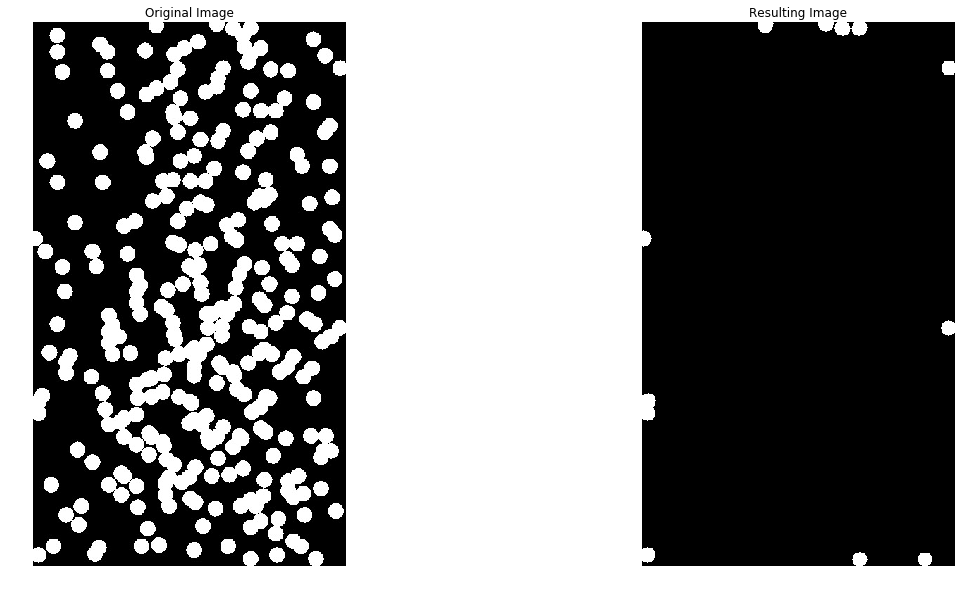

In [6]:
im = cv2.imread('./images/coins.jpg',0)
im2 = morph.binary_erosion(im, disk(10), border_value=1)

h, w = im2.shape

for i in range(h):
    for j in range(w):
        if i < 10 or j < 10 or i >= im2.shape[0] - 10 or j >= im2.shape[1] - 10:
            im2[i,j] = im2[i,j]
        else:
            im2[i,j] = 0
im2 = morph.binary_dilation(im2, disk(10))
display_helper(im, im2)



###  Part 2
#### Only the coins which overlap with each other

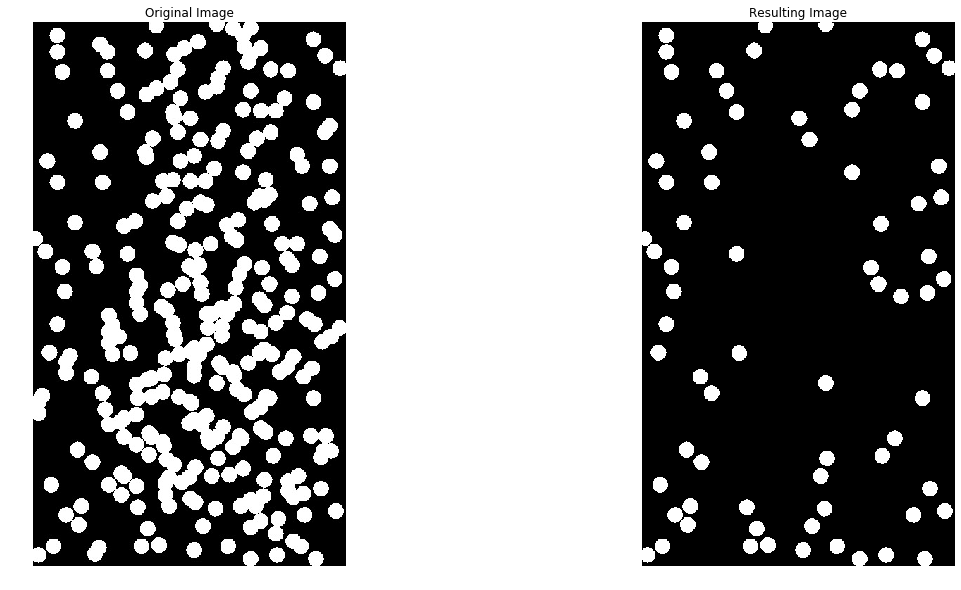

In [7]:
im = cv2.imread("images/coins.jpg",0)
i,im2 = cv2.threshold(im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
im2 = np.uint8(im2/255)

#morph binarization
im2 = morph.binary_opening(im2, disk(2))
im2 = connComponents(im2)
temp, tmparr = np.unique(im2.flatten(), axis=0, return_counts=True);


idx = np.flipud(np.argsort(tmparr))
temp = temp[idx]
tmparr = tmparr[idx]

valid = [0 for i in range(np.max(im2)+1)]

for i in range(1, len(temp)):
    if(tmparr[i] <= 500):
        valid[temp[i]] = 255
        
img = np.zeros(im.shape);
h, w = im2.shape
for i in range(h):
    for j in range(w):
        img[i,j] = valid[im2[i,j]]

img_mirror = img
display_helper(im, img_mirror)

### Part 3
#### Only non-overlapping coins

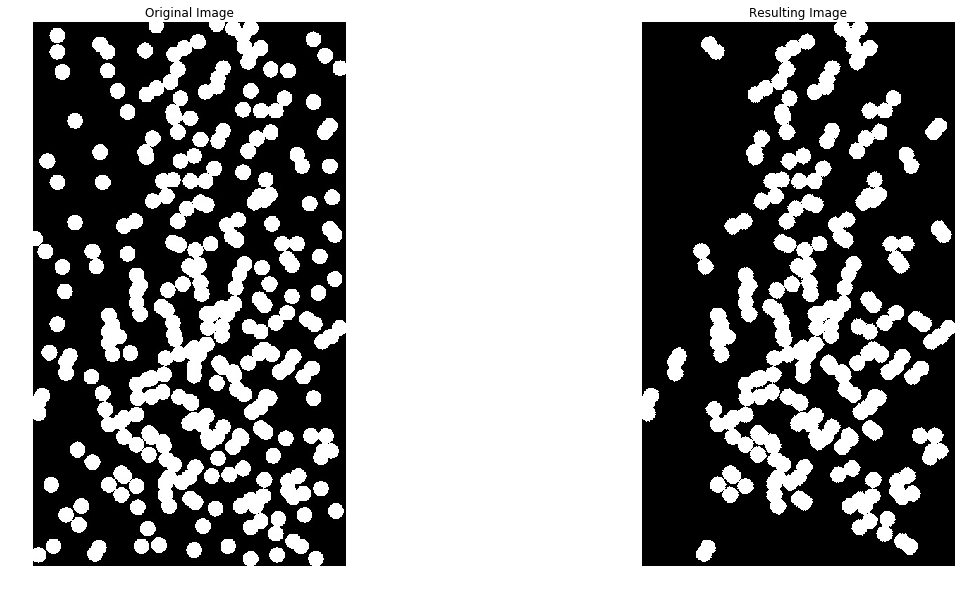

In [8]:
img = im - img
img = morph.binary_opening(img, disk(2))
display_helper(im, img)